In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'C:/Users/s_csmscox/jupyterSave/eye_blink/train'
validation_dir = 'C:/Users/s_csmscox/jupyterSave/eye_blink/valid'

batch_size = 50
img_size = 32

train_datagen = ImageDataGenerator(rescale=1/255)

# train_datagen = ImageDataGenerator(rescale=1/255,
#                                    rotation_range=20,  # 지정된 각도 범위내에서 임의로 원본 이미지를 회전
#                                    width_shift_range=0.1,
#                                    height_shift_range=0.1,
#                                    zoom_range=0.1,    #  1-수치 혹은 1+수치만큼 확대 및 축소
#                                    horizontal_flip=True,
#                                    vertical_flip=True)



validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size,img_size),                      
    batch_size=batch_size,     
    class_mode='categorical'                    
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size,img_size),                       
    batch_size=batch_size,    
    class_mode='categorical'                    
)

Found 54332 images belonging to 2 classes.
Found 13585 images belonging to 2 classes.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.applications import VGG16

np.random.seed(42)

# 모델 구축

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',
                 activation='relu',
                 input_shape=(img_size, img_size, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(4096, activation='relu', kernel_initializer='he_normal'))
#model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu', kernel_initializer='he_normal'))
#model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_initializer='he_normal'))

model.add(Dense(2, activation='softmax'))

model.summary()

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy',
                metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

In [3]:
early_stopping = EarlyStopping(patience = 5) # 조기종료 콜백함수 정의

# 데이터 개수 / batch_size
steps_per_epoch = 54332 / batch_size
val_steps = 13585 / batch_size

history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=val_steps,
                    callbacks=[early_stopping],
                    verbose=1
                    )

Epoch 1/100
1087/1086 [==============================] - 24s 22ms/step - loss: 0.3299 - accuracy: 0.8632 - val_loss: 0.2224 - val_accuracy: 0.9156
Epoch 2/100
1087/1086 [==============================] - 21s 19ms/step - loss: 0.1784 - accuracy: 0.9324 - val_loss: 0.1381 - val_accuracy: 0.9501
Epoch 3/100
1087/1086 [==============================] - 21s 19ms/step - loss: 0.1263 - accuracy: 0.9532 - val_loss: 0.1391 - val_accuracy: 0.9438
Epoch 4/100
1087/1086 [==============================] - 21s 19ms/step - loss: 0.1004 - accuracy: 0.9639 - val_loss: 0.1051 - val_accuracy: 0.9603
Epoch 5/100
1087/1086 [==============================] - 21s 19ms/step - loss: 0.0888 - accuracy: 0.9681 - val_loss: 0.0767 - val_accuracy: 0.9729
Epoch 6/100
1087/1086 [==============================] - 21s 19ms/step - loss: 0.0749 - accuracy: 0.9731 - val_loss: 0.0701 - val_accuracy: 0.9736
Epoch 7/100
1087/1086 [==============================] - 21s 19ms/step - loss: 0.0692 - accuracy: 0.9745 - val_loss: 0

In [4]:
model.compile(optimizer=Adam(learning_rate=1e-7), loss='categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=val_steps,
                    callbacks=[early_stopping],
                    verbose=1
                    )

Epoch 1/100
1087/1086 [==============================] - 21s 19ms/step - loss: 0.0158 - accuracy: 0.9946 - val_loss: 0.0402 - val_accuracy: 0.9870
Epoch 2/100
1087/1086 [==============================] - 21s 19ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0398 - val_accuracy: 0.9867
Epoch 3/100
1087/1086 [==============================] - 21s 19ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.0396 - val_accuracy: 0.9865
Epoch 4/100
1087/1086 [==============================] - 21s 19ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0395 - val_accuracy: 0.9866
Epoch 5/100
1087/1086 [==============================] - 21s 19ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0393 - val_accuracy: 0.9867
Epoch 6/100
1087/1086 [==============================] - 21s 19ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0393 - val_accuracy: 0.9865
Epoch 7/100
1087/1086 [==============================] - 21s 19ms/step - loss: 0.0139 - accuracy: 0.9958 - val_loss: 0

In [5]:
model.save('C:/Users/s_csmscox/jupyterSave/eye_blink/eye_blink_CNN.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('C:/Users/s_csmscox/jupyterSave/eye_blink/eye_blink_vgg16.h5')

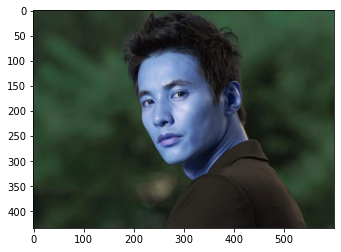

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

face_cascade = cv2.CascadeClassifier('C:/Users/s_csmscox/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/s_csmscox/anaconda3/Lib/site-packages/cv2/data/haarcascade_eye.xml')
img = cv2.imread('./face1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img)
plt.show()

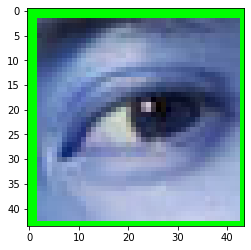

In [22]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        img_trim = img[y+ey:y+ey+eh, x+ex:x+ex+ew]
        
        
plt.imshow(img_trim)
plt.show()

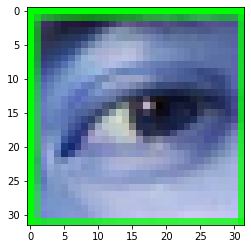

예측 : 안졸음


In [23]:
from PIL import Image

img_size =32
img_trim = Image.fromarray(img_trim)
img_trim = img_trim.resize((img_size, img_size))
img_trim = np.asarray(img_trim)

plt.imshow(img_trim)
plt.show()

img_trim = img_trim/255

img_trim = img_trim.reshape(1,img_size,img_size,3)
pred = model.predict(img_trim)

for i in pred:
    m = i.max()
    for j in range(2):
        if i[j] == m:
            if j == 0:
                print("예측 : 졸음")
            else:
                print("예측 : 안졸음")
